In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
data=pd.read_csv(r'C:\Users\Harsha\Desktop\Heart_Disease_diagonostics.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
num=data.groupby('num').size()
num

num
0    164
1    139
dtype: int64

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
def heart_disease(row):
    if row==0:
        return 'No'
    elif row==1:
        return 'Yes'

In [8]:
data['Heart_Disease']=data['num'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Yes
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Yes
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No


In [9]:
Gs=data.groupby('Heart_Disease')['num'].count()
Gs

Heart_Disease
No     164
Yes    139
Name: num, dtype: int64

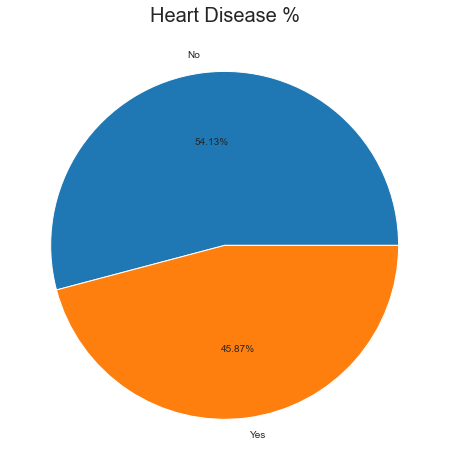

In [10]:
plt.figure(figsize=(10,8))
plt.pie(Gs, labels=['No','Yes'], autopct='%1.2f%%')
plt.title('Heart Disease %', fontsize=20)
plt.show()

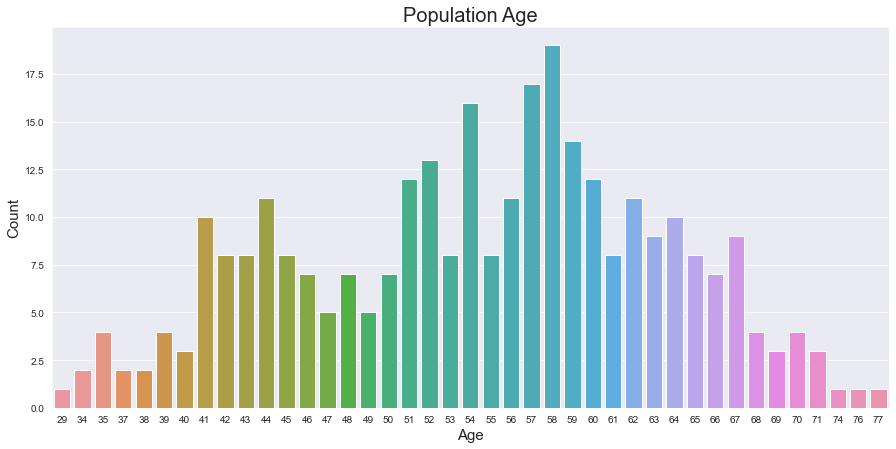

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [12]:
a=data['age'].min()
b=data['age'].max()
c=data['age'].mean()
print('Minimum_age=',a)
print('Maximum_age=',b)
print('Average_age=',c)

Minimum_age= 29
Maximum_age= 77
Average_age= 54.43894389438944


In [13]:
Young_Ages=data[(data['age']>=29) & (data['age']<40)]
Middle_Ages=data[(data['age']>=40) & (data['age']<55)]
Elderly_Ages=data[(data['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 15
Middle Ages = 128
Elderly Ages = 152


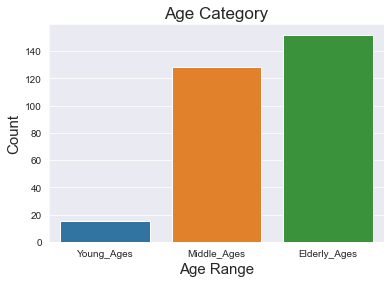

In [14]:
sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)])
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [15]:
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [16]:
data['sex1']=data['sex'].apply(gender)
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Yes,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Yes,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No,Female
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,No,Male
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,Yes,Female
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,No,Female
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,Yes,Male
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,Yes,Male


In [17]:
def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [18]:
data['Age_Range']=data['age'].apply(age_range)
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No,Male,Elder Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Yes,Male,Elder Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Yes,Male,Elder Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No,Female,Middle Age
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,No,Male,Elder Age
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,Yes,Female,Elder Age
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,No,Female,Elder Age
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,Yes,Male,Elder Age
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,Yes,Male,Middle Age


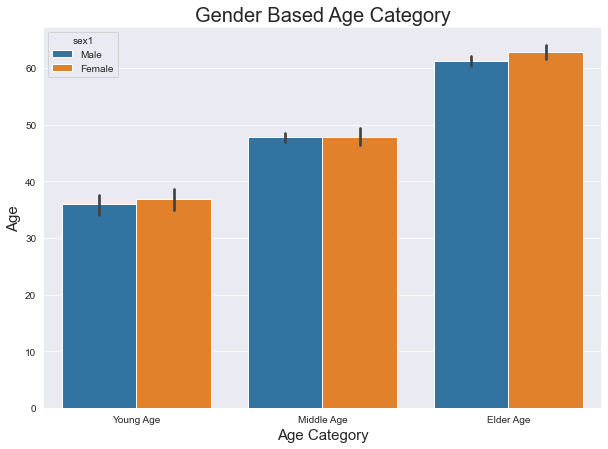

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x='Age_Range', y='age', hue='sex1', data=data, order=['Young Age','Middle Age','Elder Age'] )
plt.title('Gender Based Age Category', fontsize=20)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

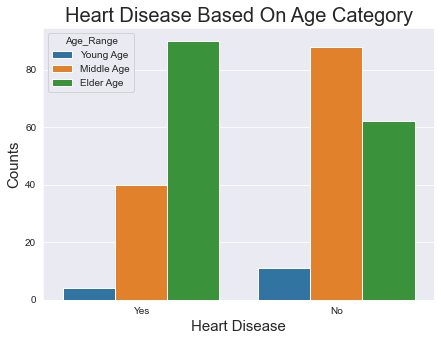

In [20]:
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Yes','No'], hue_order=hue_order)
plt.title('Heart Disease Based On Age Category', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

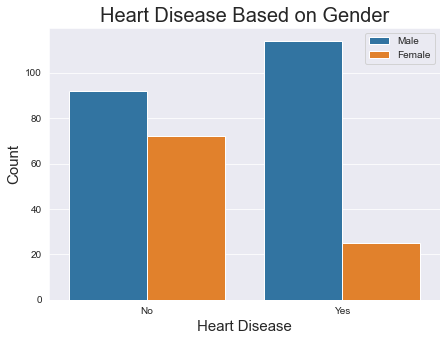

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='sex1', data=data)
plt.title('Heart Disease Based on Gender',fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.show()

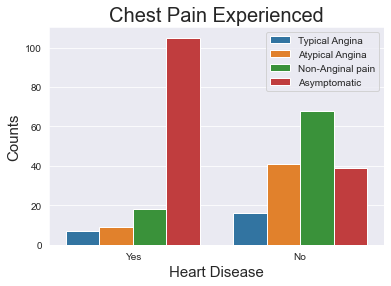

In [22]:
sns.countplot(x=data['Heart_Disease'], hue='cp', data=data, order=['Yes','No'])
plt.title('Chest Pain Experienced', fontsize=20)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

In [23]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No,Male,Elder Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Yes,Male,Elder Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Yes,Male,Elder Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No,Female,Middle Age
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,No,Male,Elder Age
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,Yes,Female,Elder Age
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,No,Female,Elder Age
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,Yes,Male,Elder Age
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,Yes,Male,Middle Age


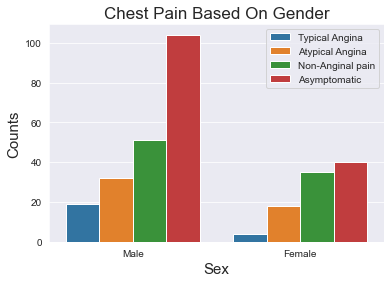

In [24]:
sns.countplot(x=data['sex1'], hue='cp',data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

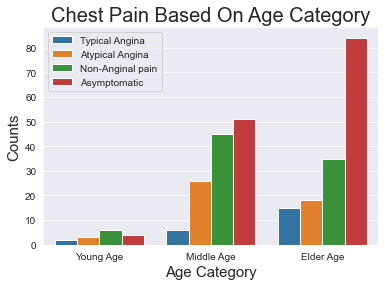

In [25]:
sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'])
plt.title('Chest Pain Based On Age Category', fontsize=20)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

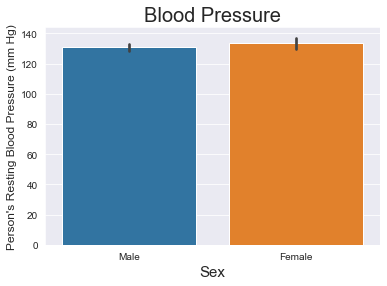

In [26]:
sns.barplot(x='sex1', y='trestbps', data=data)
plt.title("Blood Pressure", fontsize=20)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

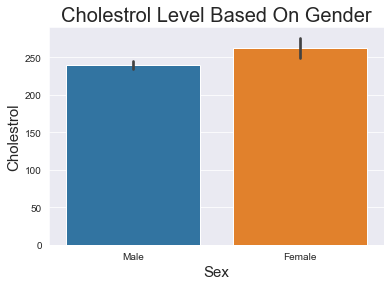

In [27]:
sns.barplot(x='sex1', y='chol', data=data)
plt.title("Cholestrol Level Based On Gender", fontsize=20)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

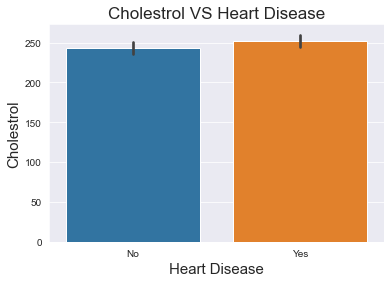

In [28]:
sns.barplot(x='Heart_Disease', y='chol', data=data)
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

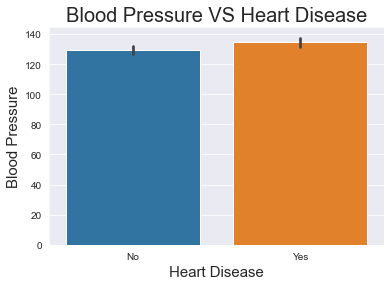

In [29]:
sns.barplot(x='Heart_Disease', y='trestbps', data=data)
plt.title('Blood Pressure VS Heart Disease', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

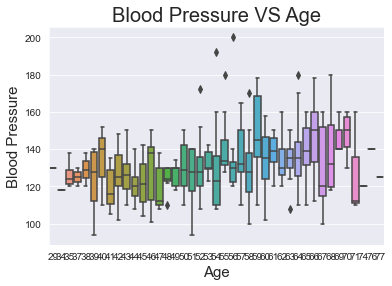

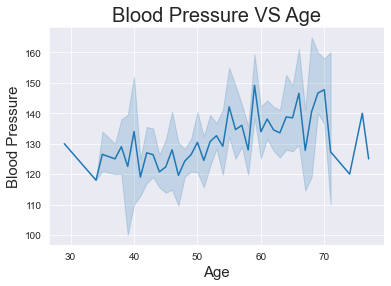

In [30]:
sns.boxplot(x='age', y='trestbps', data=data)
plt.title('Blood Pressure VS Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show() 

sns.lineplot(x='age', y='trestbps', data=data)
plt.title('Blood Pressure VS Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

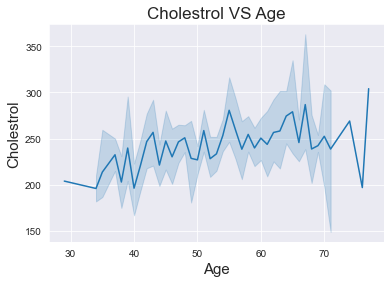

In [31]:
sns.lineplot(x='age', y='chol', data=data)
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

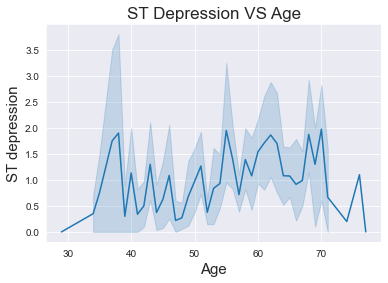

In [32]:
sns.lineplot(x='age', y='oldpeak', data=data)
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

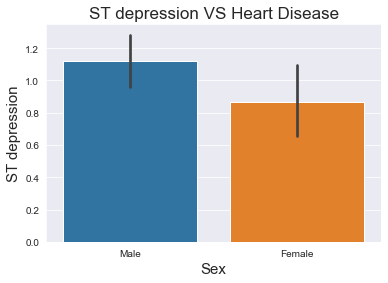

In [33]:
sns.barplot(x='sex1', y='oldpeak', data=data)
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

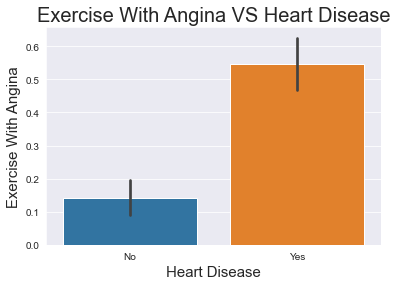

In [34]:
sns.barplot(x='Heart_Disease', y='exang', data=data)
plt.title('Exercise With Angina VS Heart Disease', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

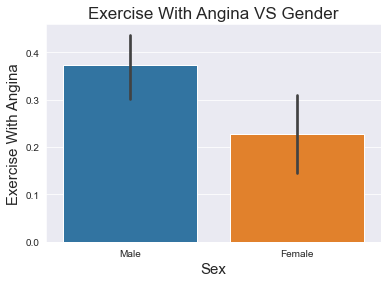

In [35]:
sns.barplot(x='sex1', y='exang', data=data)
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

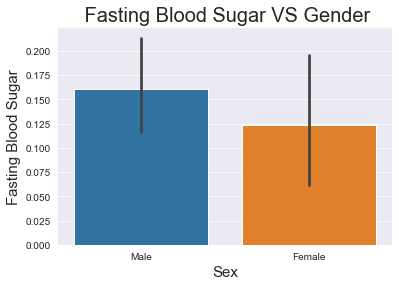

In [38]:
sns.barplot(y='fbs', x='sex1', data=data)
plt.title(' Fasting Blood Sugar VS Gender', fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

<AxesSubplot:>

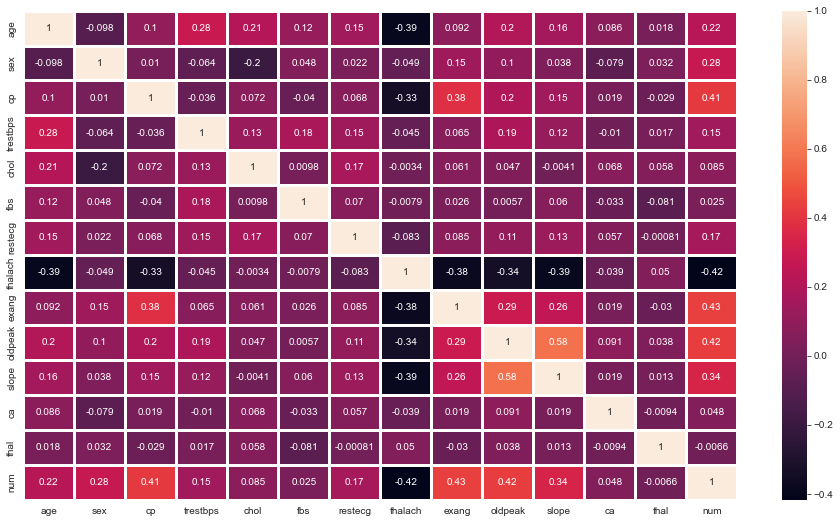

In [37]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)

PowerBI Deployment :  
https://github.com/Girshshetty/Heart-disease-diagnostic/blob/main/PowerBI.pdf